In [1]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import easypyplot

In [17]:
''' [TODO] Figure properties. Specify the csv file and corresponding labels. '''
csv_path = './sec7/barchart_breakdown.csv'
workload_list = ['Workload1', 'Workload2', 'Workload3']
scheme_list = ['Feature1', 'Feature2', 'Feature3', 'Feature4']
workload_dict = {item: item for item in workload_list}
scheme_dict = {item: item for item in scheme_list}

fig_title = 'Performance Breakdown'
fig_name = 'FigDemo'
fig_ylim = (0, 3.5)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1], 1))
fig_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [3, 2, 1, 0]]
assert len(fig_bar_colors) == len(scheme_dict)

# pprint(fig_yticks)

In [19]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.3
fig_dims = (5, 2)
fig_label_fontsize = 9
# params = {'font.family'      : 'normal',
#           'font.weight'      : 'normal',
#           'font.size'        : 22,
#           'xtick.labelsize'  : 15,
#         }
# plt.rcParams.update(params)
# fig_text_font = 'Times New Roman'

In [4]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
# TODO assert workload_name
# TODO assert scheme_name
fig_xlabels = []
fig_xticks = []
fig_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        fig_data_2darr.append(row_value)
        fig_xlabels.append(workload_fullname)
        xtick += 1
        fig_xticks.append(xtick)
assert len(fig_data_2darr) == len(fig_xlabels) == len(fig_xticks)

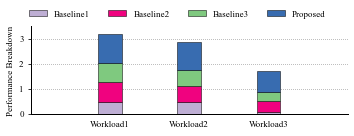

In [20]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

h = easypyplot.barchart.draw(
    ax, fig_data_2darr,
    width=fig_bar_width,
    breakdown=True,
    group_names=fig_xlabels,
    xticks=fig_xticks,
    xticklabelfontsize=fig_label_fontsize,
    # xticklabelrotation=25, # Uncomment this for rotated x tick labels
    colors=fig_bar_colors)

''' x axis '''
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.set_xticks(fig_xticks)
ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize)
ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# ax.tick_params(direction='in') # [in, out, inout]
# ax.set_xlabel(fig_title)

''' y axis '''
ax.yaxis.grid(True)
ax.set_ylim(fig_ylim)
ax.set_yticks(fig_yticks)
ax.set_ylabel(fig_title, multialignment='center')

''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(h, legend, loc='upper center', bbox_to_anchor=(0.5, 1.1),
        ncol=len(legend), frameon=False)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.8)

In [ ]:
''' Save figures'''
fig.savefig(fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures